In [1]:
# Imports
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib notebook

So far we’ve talked about SVM with linear boundaries. We put together an example in the previous assignment. Our boundary was a line with a given slope and intercept, a pretty simple thing to visualize. However, a straight line doesn't always nicely classify our data.

In this assignment we’ll show you that we can create non-linear decision boundaries by transforming our data into a higher dimension, finding a good hyperplane boundary in the higher dimension, and transforming the result back to our starting data. We'll also quickly cover the "kernel trick" that SVM uses to _actually_ find our boundary hyperplane in an efficient way that would otherwise be computationally prohibitive using that brute force solution.

Note: this assignment includes interactive 3d plots. Take a moment now to restart the kernel and run all cells.

## Thinking outside the plane

Let's say you have some data that looks like this:

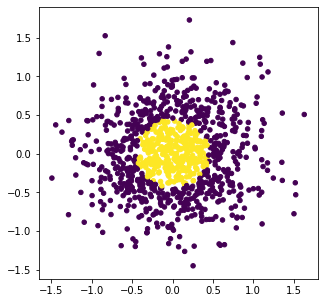

In [2]:
data = pd.DataFrame()
data['x'] = np.random.normal(0, .5, 1000)
data['y'] = np.random.normal(0, .5, 1000)

# Create your circle of indicators
data['d'] = data.x**2 + (data.y)**2 < .2

plt.figure(figsize=(5,5))
plt.scatter(data['x'], data['y'], c=data['d'], s= 20)

Clearly no straight line boundary is going to do a good job here. What you _really_ want is a circular boundary. Is there any way to do that with a hyperplane? Yes. You just need a little perspective. Let's transform our data from two dimensions into three dimensions by adding a new feature. Specifically, let's add the new feature $x^2 + y^2$.

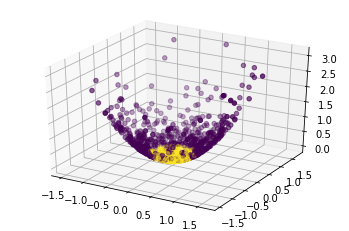

In [3]:
# We're doing some 3D plotting now. 
# Tinker with it if you like but python is generally not great at this kind of thing...

from mpl_toolkits.mplot3d import Axes3D

# Make our new variable
data['x2_y2'] = data.x**2 + data.y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)

You can move these 3d plots around to get a good perspective on what's going on.

A hyperplane of this new three-dimensional space is just a regular old two-dimensional plane. Let's slip one in right between our classes.

AttributeError: 'float' object has no attribute 'ndim'

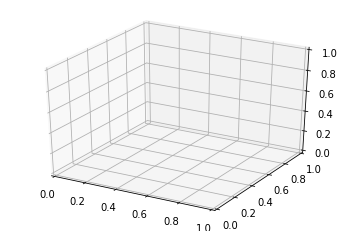

In [4]:

from mpl_toolkits.mplot3d import Axes3D

# Make our new variable
data['x2_y2'] = data.x**2 + data.y**2


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(range(-5, 5, 1), range(-5, 5, 1))
ax.plot_surface(xx, yy, .2, color='k', alpha=.5)
ax.hold(True)
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)


Transforming back to two dimensions, we end up with exactly the nonlinear boundary we need.

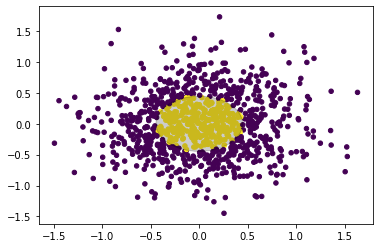

In [5]:
circle1 = plt.Circle((0, 0), np.sqrt(.2), color='k', alpha=.2)

fig, ax = plt.subplots()

ax.scatter(data['x'], data['y'], c=data['d'], s= 20)
ax.add_artist(circle1)

This can take a bit to wrap your mind around. Here's an excellent 3d animated example.

[![SVM higher dimension visualization](assets/SVM_visualization.png)](http://www.youtube.com/watch?v=3liCbRZPrZA "SVM with polynomial kernel visualization")

Bam, problem solved. We were able to generate a nice boundary by transforming into higher dimensional space, finding the optimal hyperplane, and then transforming back.

## Kernels and the "kernel trick"

Here's the bad news. In practice you won't have the computational resources to do this. Knowing how many dimensions you’ll need is not a simple calculation, and for real data you'll probably want to run SVM with a _very_ large number of features leading to a _very high_ dimensional space. Trying to _actually_ transform your data like this would require more computational and memory resources than you practically have at your disposal, making this transformation impractical when working with real data.

The good news is that we can find the optimal hyperplane of a higher dimensional space _without actually transforming our data into that space_. Really? Really. The process SVM uses for this is called **the kernel trick**. The kernel trick turns our search for a higher dimensional hyperplane boundary from a practical impossibility into a computationally reasonable task. The vector math involved in the kernel trick is too much for us to completely explain here. We'll dive into it just enough for you to tune these models, but we’ll link out to several external resources for those who wish to go deeper. Don’t feel compelled to read all of them to complete comprehension.


### What _is_ a kernel?

You’ve heard the term "kernel" previously to refer to the central hub of your computer, linking hardware and OS. You might be used to stopping and re-running your Python kernel in Jupyter notebooks. What we’re talking about here is _totally different_.

Here we think of **kernel functions** (or just "kernels") as a way of mapping data to a space using weights. You can see kernels all over data science once you start looking for them.

The most common example is probably [kernel smoothing](https://en.wikipedia.org/wiki/Kernel_smoother). With kernel smoothing you take a series of observations and instead of plotting each one individually you generate a smoothed curve. This smoothing is a byproduct of each observation becoming a weighted distribution in and of itself and then aggregating those cumulative distributions, resulting in something smooth rather than jumpy.

Kernels are a huge topic, and as a term it’s used to refer to many different but related concepts. The [wiki disambiguation page for kernels](https://en.wikipedia.org/wiki/Kernel) has links to 22 different pages on kernels that are in some way related to mathematics or computing. It’s definitely a lot, and a field worthy of its own course (or more honestly several).


### Kernels in SVM

For our purposes with SVM, a kernel is a function that computes how "similar" two vectors are by computing their dot product. Even more specifically, in SVM a **kernel** is a _function that_ implicitly _computes the dot product between two vectors in a higher-dimensional space without_ actually _transforming the vectors into that space_.

This property is handy because _the dot product is all we need_ to find our optimal hyperplane in a higher dimensional space. Trust us for now on that. The complexity of these kernel functions depend only on the number of dimensions of the input, not on the number of dimensions in the higher-dimensional feature space, so you can work with an infinite-dimensional feature space just as easily as with the space of your input data. This is called the **kernel trick**, and lets us work with feature spaces that would otherwise be practically impossible to manage.

## Additional resources

You don't need to know more than this right now. If, however, you want a full explanation of the math behind the kernel trick read this [post by Eric Kim](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html), then this [paper by Martin Hoffman](http://www.cogsys.wiai.uni-bamberg.de/teaching/ss06/hs_svm/slides/SVM_Seminarbericht_Hofmann.pdf). This [hour lecture from Patrick Winston](https://www.youtube.com/watch?v=_PwhiWxHK8o) is a good short-breathed derivation of everything you've covered in SVM so far. All those links are optional. If you don't have a good intuition of why dot products are important, check out this [video by Sal Khan](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/vector-dot-product-and-vector-length) from Khan Academy's linear algebra sequence.

## Kernel Estimation in Practice

Now, there are multiple kernels you can use in SVM. The default in SKLearn is called the __radial basis function__, which uses a Gaussian decay according to the distance from the original point. This is the most common choice, and for our purposes you should stick to it unless you have a strong reason not to.

You can also use linear kernels, polynomial kernels, or sigmoid kernels - all of which are preprogrammed into SKLearn’s `SVC` function.

When do you have a strong reason to choose another kernel? You may know enough about your data and [the geometry it follows](https://stats.stackexchange.com/a/18032) that you can choose a more appropriate kernel. The other, more common, method for deciding which kernel to use is to rely upon cross-validation. As long as you are within the training set, using cross validation is a reasonable way to choose a kernel methodology, but if you're tuning other hyperparameters as well this could become quite a long process. Be aware that some kernels will lead to overfitting in specific situations, so you want to be wary.
